# Load the dataset from dataset folder

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url =  "dataset/abalone.data"
columnNames = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
abaloneData = pd.read_csv(url, names=columnNames)


# Display the first few rows of the dataset

In [3]:
print(abaloneData.head())
print(abaloneData.describe())

  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  
            Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0

# Define a function to add watermark to the plot

In [4]:
def add_watermark(ax, text):
    ax.text(0.5, 0.5, text, alpha=0.3, fontsize=50, color='gray',
            rotation=0, ha='center', va='center', transform=ax.transAxes)

# Bivariate Plots

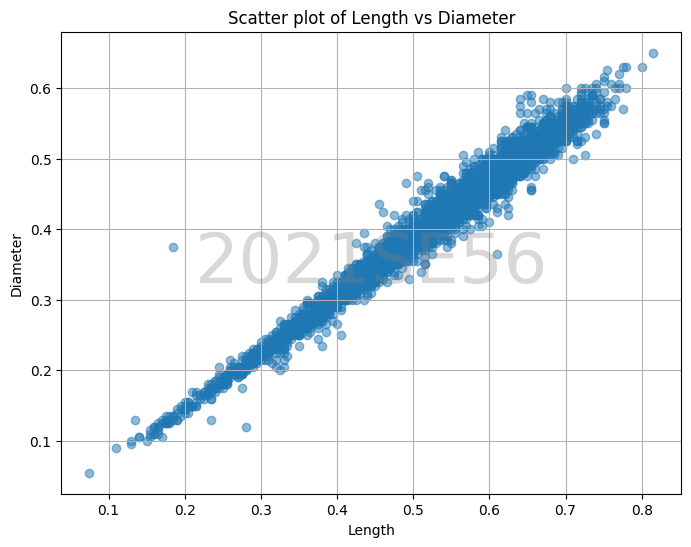

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(abaloneData['Length'], abaloneData['Diameter'], alpha=0.5)
plt.title('Scatter plot of Length vs Diameter')
plt.xlabel('Length')
plt.ylabel('Diameter')
plt.grid(True)
# Add watermark
add_watermark(plt.gca(), '2021SE56')
plt.show()

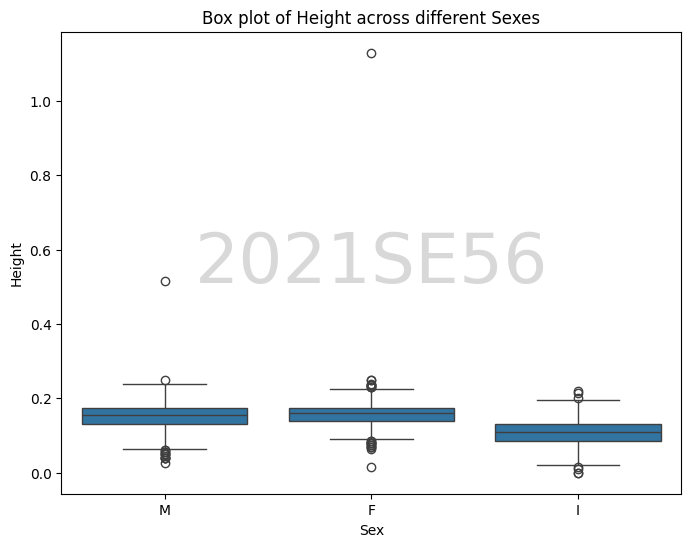

In [6]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='Height', data=abaloneData)
plt.title('Box plot of Height across different Sexes')
plt.xlabel('Sex')
plt.ylabel('Height')
# Add watermark
add_watermark(plt.gca(), '2021SE56')
plt.show()

# Multivariate Plots

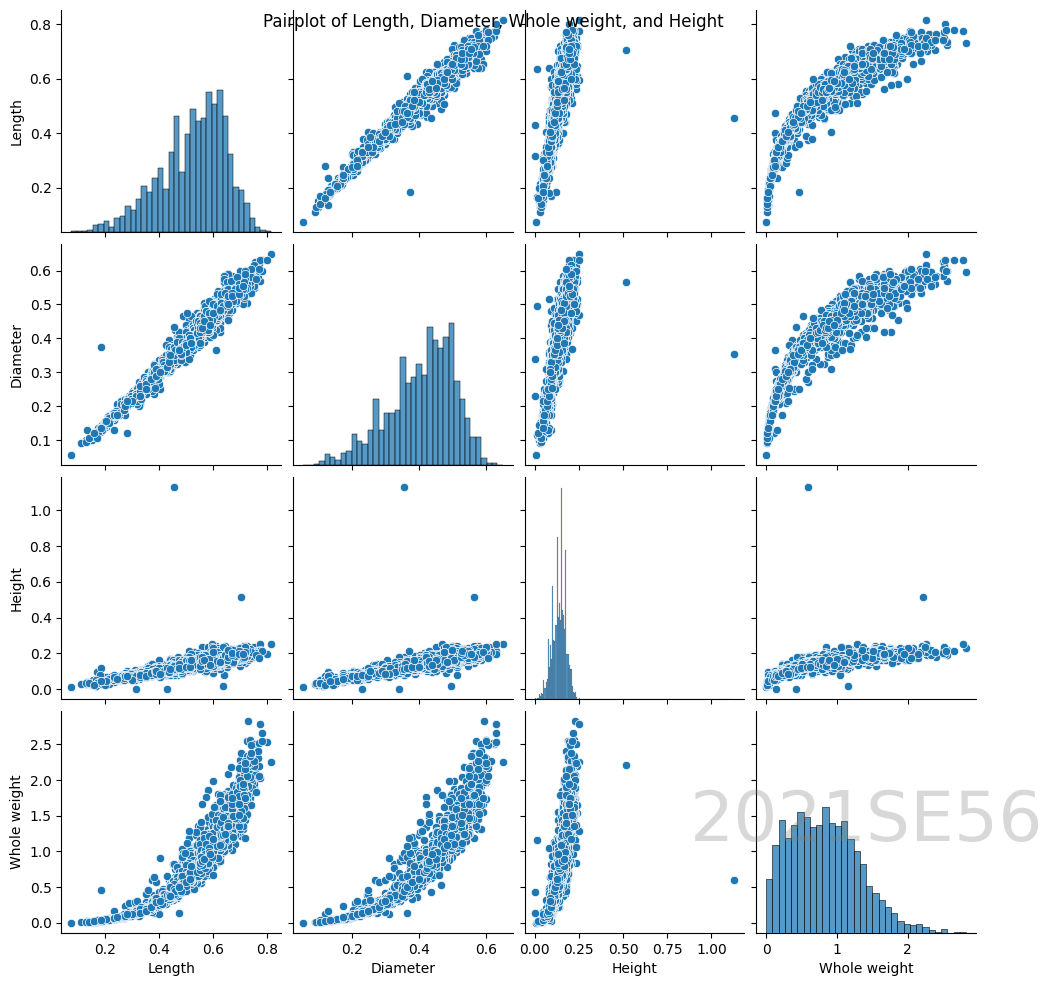

In [7]:
sns.pairplot(abaloneData[['Length', 'Diameter', 'Height', 'Whole weight']])
plt.suptitle('Pairplot of Length, Diameter, Whole weight, and Height')
# Add watermark
add_watermark(plt.gca(), '2021SE56')
plt.show()

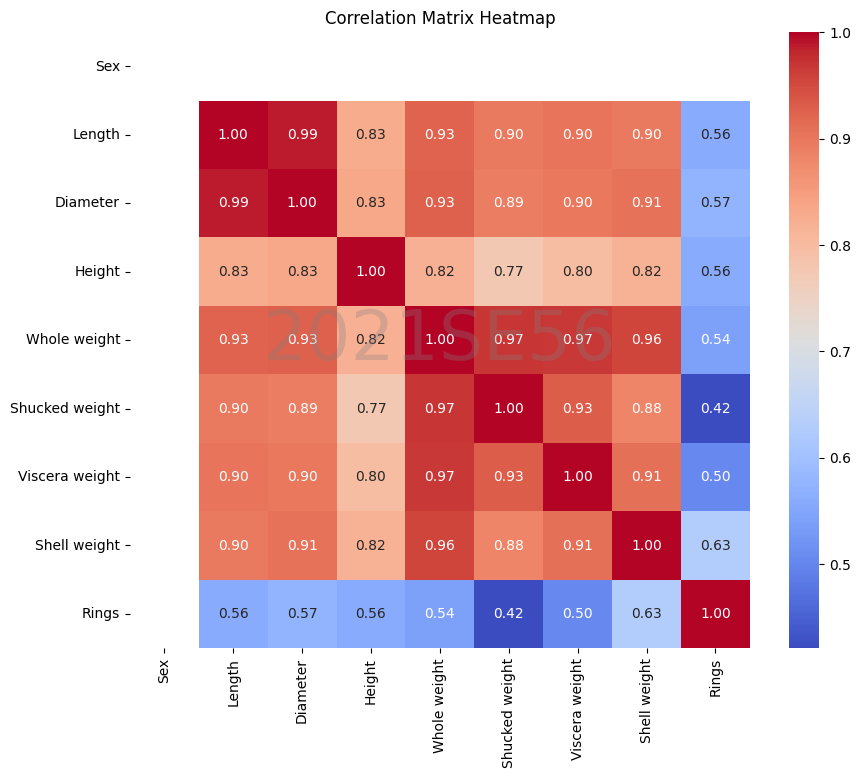

In [11]:
# Convert 'Sex' column to numerical values
abaloneData['Sex'] = abaloneData['Sex'].map({'M': 0, 'F': 1, 'I': 2})

# Calculate correlation matrix
corr_matrix = abaloneData.corr()

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
add_watermark(plt.gca(), '2021SE56')
plt.show()

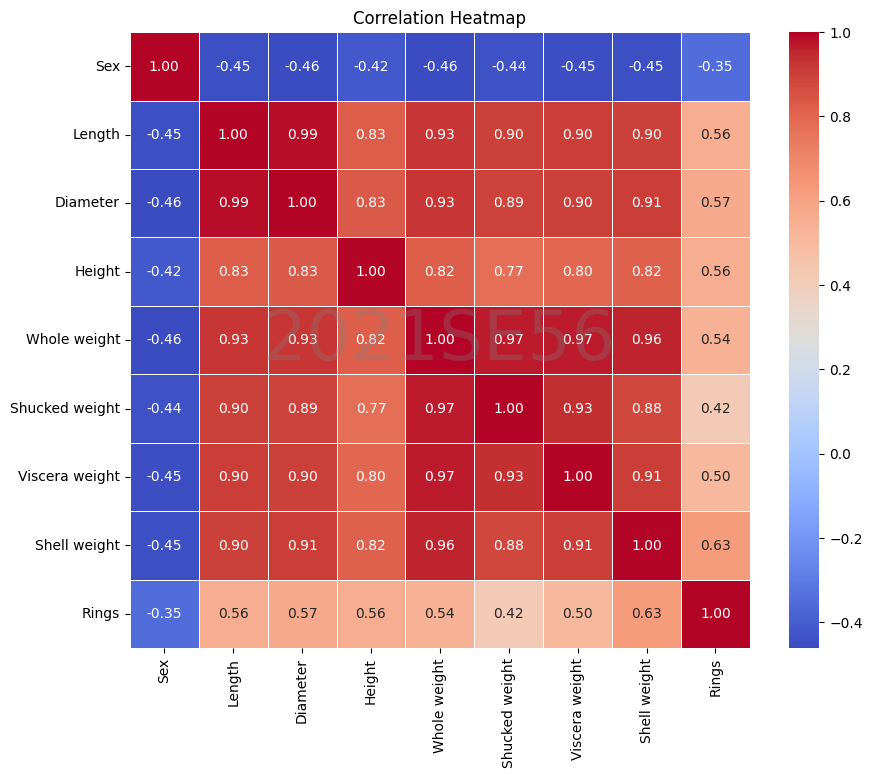

In [9]:
# Convert 'Sex' column to numerical values
abaloneData['Sex'] = abaloneData['Sex'].map({'M': 0, 'F': 1, 'I': 2})

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(abaloneData.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')

# Add watermark
add_watermark(plt.gca(), '2021SE56')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode the 'Sex' column using one-hot encoding
abalone_data_encoded = pd.get_dummies(abaloneData, columns=['Sex'])

# Split the dataset into features (X) and target (y)
X = abalone_data_encoded.drop('Rings', axis=1)
y = abalone_data_encoded['Rings']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# kNN Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)

# Naïve Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)


Evaluation Metrics for kNN Classifier:
Confusion Matrix:
[[ 0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  4  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3 10  7  6  4  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  7 18 16  4  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  6 20 26 18 10  1  1  1  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  3  4 16 39 24  8  1  3  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  5  8 37 44 24 15  7  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  8 31 38 27 18  7  5  2  0  2  0  1  0  0  0  0  0]
 [ 0  0  0  0  5 10 26 22 18  6  5  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  2  7 11 13 11  2  4  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  2  2  3  5  6  4  7  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  2 11  1  2  0  2  1  1  2  0  0  0  0  0  0]
 [ 0  0  0  0  1  1  4  2  1  1  5  1  3  0  1  0  1  0  0  0  0]
 [ 0  0  0  0  1  0  0  4  2  3  0  1  0  1  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  

c:\Users\ST\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


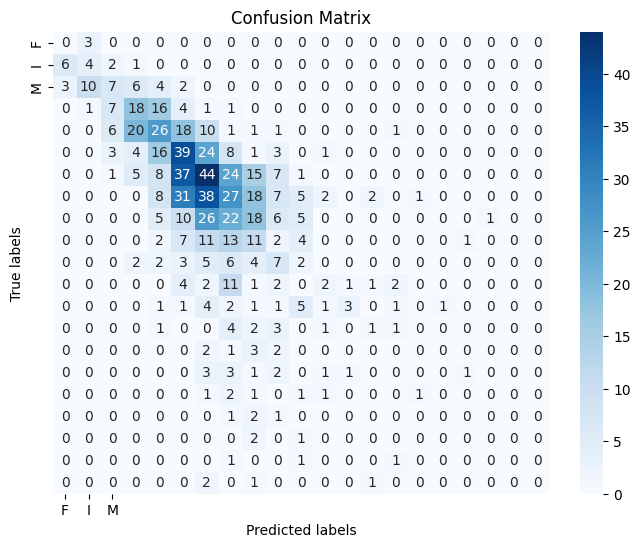


Evaluation Metrics for Naïve Bayes Classifier:
Confusion Matrix:
[[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 8  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 6 13  9  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4 19 12 10  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 14 22 25 13  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  6 21 29 32  3  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  7 19 20 48 19 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  6 10 21 36 18 44  0  0  0  0  0  0  0  0  4  0  0  0  0  0]
 [ 0  0  2  1  5  9 19  8 49  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  2  5 14  6 18  0  0  0  0  0  0  0  0  1  0  0  1  1  1]
 [ 0  0  0  2  3  3  5  7 10  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  7  8  3  5  0  0  0  0  0  0  0  0  0  0  0  1  1  1]
 [ 0  0  0  0  0  5  7  7  1  0  0  0  0  0  0  1  0  0  0  0  0  0  0

c:\Users\ST\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ST\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


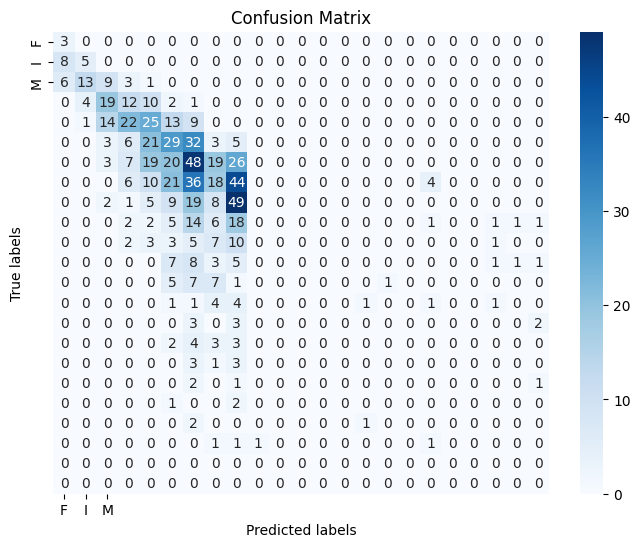

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
columnNames = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]
abaloneData = pd.read_csv(url, names=columnNames)

# Encode the 'Sex' column using LabelEncoder
label_encoder = LabelEncoder()
abaloneData['Sex'] = label_encoder.fit_transform(abaloneData['Sex'])

# Split the dataset into features (X) and target (y)
X = abaloneData.drop('Rings', axis=1)
y = abaloneData['Rings']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# kNN Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)

# Naïve Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)

# Evaluation Metrics function
def evaluate_classifier(y_true, y_pred):
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print("Accuracy:", accuracy)
    
    # Precision
    precision = precision_score(y_true, y_pred, average='weighted')
    print("Precision:", precision)
    
    # Recall
    recall = recall_score(y_true, y_pred, average='weighted')
    print("Recall:", recall)
    
    # F1-Score
    f1 = f1_score(y_true, y_pred, average='weighted')
    print("F1-Score:", f1)
    
    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Evaluate kNN Classifier
print("\nEvaluation Metrics for kNN Classifier:")
evaluate_classifier(y_test, knn_predictions)

# Evaluate Naïve Bayes Classifier
print("\nEvaluation Metrics for Naïve Bayes Classifier:")
evaluate_classifier(y_test, nb_predictions)